# Constraining the nuclear equation of state with GW170817

**Soumi De<sup>1</sup>, Daniel Finstad<sup>1</sup>, James M. Lattimer<sup>1</sup>, Duncan A. Brown<sup>1</sup>, Edo Berger<sup>2</sup>, Christopher M. Biwer<sup>1,3</sup>**

**<sup>1</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

**<sup>1</sup>Department of Physics and Astronomy, Stony Brook University, Stony Brook, NY 11794-3800, USA**

**<sup>2</sup>Harvard-Smithsonian Center for Astrophysics, Cambridge, Massachusetts 02139, USA**

**<sup>3</sup>Applied Computer Science (CCS-7), Los Alamos National Laboratory, Los Alamos, NM, 87545, USA**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

This notebook is a companion to the paper posted at [arxiv:1804.08583](https://arxiv.org/abs/1804.08583). It demonstrates how to read and use our posterior probability density files from the MCMC and shows how to reconstruct figures 2 and 3 in the main text and figures 2 and 4 in the supplementary material from the raw data.

We encourage use of these data in derivative works. If you use the material provided here, please cite the paper using the reference:
```
@article{De:2018uhw,
      author         = "De, Soumi and Finstad, Daniel and Lattimer, James M. and
                        Brown, Duncan A. and Berger, Edo and Biwer, Christopher
                        M.",
      title          = "{Constraining the nuclear equation of state with
                        GW170817}",
      year           = "2018",
      eprint         = "1804.08583",
      archivePrefix  = "arXiv",
      primaryClass   = "astro-ph.HE",
      SLACcitation   = "%%CITATION = ARXIV:1804.08583;%%"
}
```

The data provided contain the thinned posterior samples from the MCMC chains used to produce the posterior probability density plots and the Bayes factors. These data are stored in the files:

 1. [dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the double neutron star mass prior, and a 20 Hz low-frequency cutoff in the analysis.
 2. [dns_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/dns_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the double neutron star mass prior, and a 20 Hz low-frequency cutoff in the analysis. -- used for Bayes factor calculation in the paper. This is a larger file with more samples than the file above.
 3. [dns_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/dns_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where the individual star's tidal deformation parameters are uncorrelated, 0 < Lambda_1 < 1000, 0 < Lambda_2 < 5000, use the double neutron star mass prior, and a 20 Hz low-frequency cutoff in the analysis -- used for Bayes factor calculation in the paper.
 4. [galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the Galactic neutron star mass prior, and a 20 Hz low-frequency cutoff in the analysis.
 5. [galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the Galactic neutron star mass prior, and a 20 Hz low-frequency cutoff in the analysis -- used for Bayes factor calculation in the paper. This is a larger file with more samples than the file above.
 6. [galactic_ns_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/galactic_ns_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where the individual star's tidal deformation parameters are uncorrelated, 0 < Lambda_1 < 1000, 0 < Lambda_2 < 5000, use the Galactic neutron star mass prior, and a 20 Hz low-frequency cutoff in the analysis -- used for Bayes factor calculation in the paper.
 7. [uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the uniform mass prior, and a 20 Hz low-frequency cutoff in the analysis.
 8. [uniform_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/uniform_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the uniform mass prior, and a 20 Hz low-frequency cutoff in the analysis -- used for Bayes factor calculation in the paper. This is a larger file with more samples than the file above.
 9. [uniform_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/uniform_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where the individual star's tidal deformation parameters are uncorrelated, 0 < Lambda_1 < 1000, 0 < Lambda_2 < 5000, use the uniform mass prior, and a 20 Hz low-frequency cutoff in the analysis -- used for Bayes factor calculation in the paper.
 10. [uniform_mass_prior_lambda_s_lessthan100_20hz_lowfreq_posteriors_long_chain.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/uniform_mass_prior_lambda_s_lessthan100_20hz_lowfreq_posteriors_long_chain.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, the uniform mass prior, require 0 < Lambda_s < 100, and a 20 Hz low-frequency cutoff in the analysis -- used for Bayes factor calculation in the paper.
 11. [uniform_mass_prior_common_eos_25hz_lowfreq_posteriors.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/uniform_mass_prior_common_eos_25hz_lowfreq_posteriors.hdf) contains a thinned chain of the posterior samples from the MCMC where we use the common EOS constraint, 0 < Lambda_s < 5000, the uniform mass prior, and a 25 Hz low-frequency cutoff in the analysis.
 12. [independent_lambda_uniform_mass_30hz_lowfreq_posterior.hdf](https://github.com/sugwg/gw170817-common-eos/blob/master/independent_lambda_uniform_mass_30hz_lowfreq_posterior.hdf) contains the posterior samples from the MCMC where we do not apply the common EOS constraint allowing the tidal deformability parameters of the component stars Lambda_1,2 to vary independently between 0 and 3000, use the uniform [1.0, 2.0] M_sun mass prior, and a 30 Hz low-frequency cutoff in the analysis. This is used to compare our results to Fig. 5 of [Abbott et al. (2017)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.119.161101).

The results used in the paper were generated with the [PyCBC v1.9.4 release.](https://github.com/gwastro/pycbc/releases/tag/v1.9.4)

## Running this notebook in a Docker container

This notebook can be run from a PyCBC Docker container, or a machine with PyCBC installed. Instructions for [downloading the docker container](http://gwastro.github.io/pycbc/latest/html/docker.html) are available from the [PyCBC home page.](https://pycbc.org/) To start a container with instance of Jupyter notebook, run the commands
```sh
docker pull pycbc/pycbc-el7:v1.9.4
docker run -p 8888:8888 --name pycbc_notebook -it pycbc/pycbc-el7:v1.9.4 /bin/bash -l
```
Once the container has started, this git repository can be downloaded with the command:
```sh
git clone https://github.com/sugwg/gw170817-common-eos.git
```
The notebook server can be started inside the container with the command:
```sh
jupyter notebook --ip 0.0.0.0 --no-browser
```
You can then connect to the notebook server at the URL printed by ``jupyter``. Navigate to the directory `gw170817-common-eos` in the cloned git repository and open [data_release_common_eos_companion.ipynb](https://github.com/sugwg/gw170817-common-eos/blob/master/data_release_common_eos_companion.ipynb) (this notebook).

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pycbc.io.inference_hdf import InferenceFile
from pycbc.results.scatter_histograms import create_density_plot
import numpy
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 16

The data files store posteriors for the parameters that were varied, `variable_args` in the MCMC. To check these parameter names, use the appropriate file and do :

In [3]:
fp = h5py.File("dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'mass1' 'mass2' 'coa_phase' 'inclination' 'polarization' 'lambdasym'
 'spin1z' 'spin2z']


Posteriors for the `variable_args` are stored inside the `samples` group of the hdf data files. `tc` is the time of coalescence, `mass1` and `mass2` are the detector frame component masses, `coa_phase` is the time of coalescence, `inclination` is the inclination angle, `polarization` is the polarization angle, and `spin1z` and `spin2z` are the sligned spin components. The files for our analyses using the common EOS model stores posteriors for the $\Lambda_s$ parameter under the name `lambdasym`. Eq. (8) of the main text is then used to obtain $\Lambda_1$ and $\Lambda_2$ from $\Lambda_s$. The files for our analyses **not** using the common EOS model include posteriors for the $\Lambda_1$ and $\Lambda_2$ parameters---which are varied in the MCMC. To read posteriors for any of the `variable_args`, say `lambdasym`, do :

In [5]:
fp = h5py.File("dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf", "r")
lambdasym_samples = fp['samples/lambdasym'][:]
fp.close()
print lambdasym_samples

[364.94209465  70.32031705 297.66088125 ... 154.88529964 774.43369087
 321.88513712]


Using the PyCBC software, one can map the posteriors for the `variable_args` to other posteriors. PyCBC has several functions that can be used to do the general transforms between parameters. You can look in `pycbc.conversions`, `pycbc.coordinates`, `pycbc.cosmology` for the possible transforms that you can do with the available `variable_args`. For example, to obtain `lambda_tilde` from `mass1`, `mass2`, `lambda1`, `lambda2`, one would do :

In [6]:
from pycbc import conversions

fp=InferenceFile("independent_lambda_uniform_mass_30hz_lowfreq_posterior.hdf",'r')
mass1 = fp['samples/mass1'][:]
mass2 = fp['samples/mass2'][:]
lambda1 = fp['samples/lambda1'][:]
lambda2 = fp['samples/lambda2'][:]
fp.close()

lambda_tilde = conversions.lambda_tilde(mass1, mass2, lambda1, lambda2)
print lambda_tilde

[324.73942884 272.35430672 181.71559258 ... 271.64271355 619.28332719
 197.64224747]


To get the redshift from distance one have to would do :

In [7]:
from pycbc import cosmology

distance=40.7 # in Mpc
redshift=cosmology.redshift(distance)
print redshift

0.00904737955578


## To plot Fig. 2 - main text :
### $\Lambda_1 - \Lambda_2$ posterior probability density from common EOS constraint analyses

Using the following code one can make the plot for the uniform mass prior (left panel plot in the paper). For `filename` use `dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf` to make the plot from the Double Neutron Stars mass prior analysis (middle panel), and use `galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf` to make the plot from the Galactic Neutron Stars mass prior analysis (right panel).

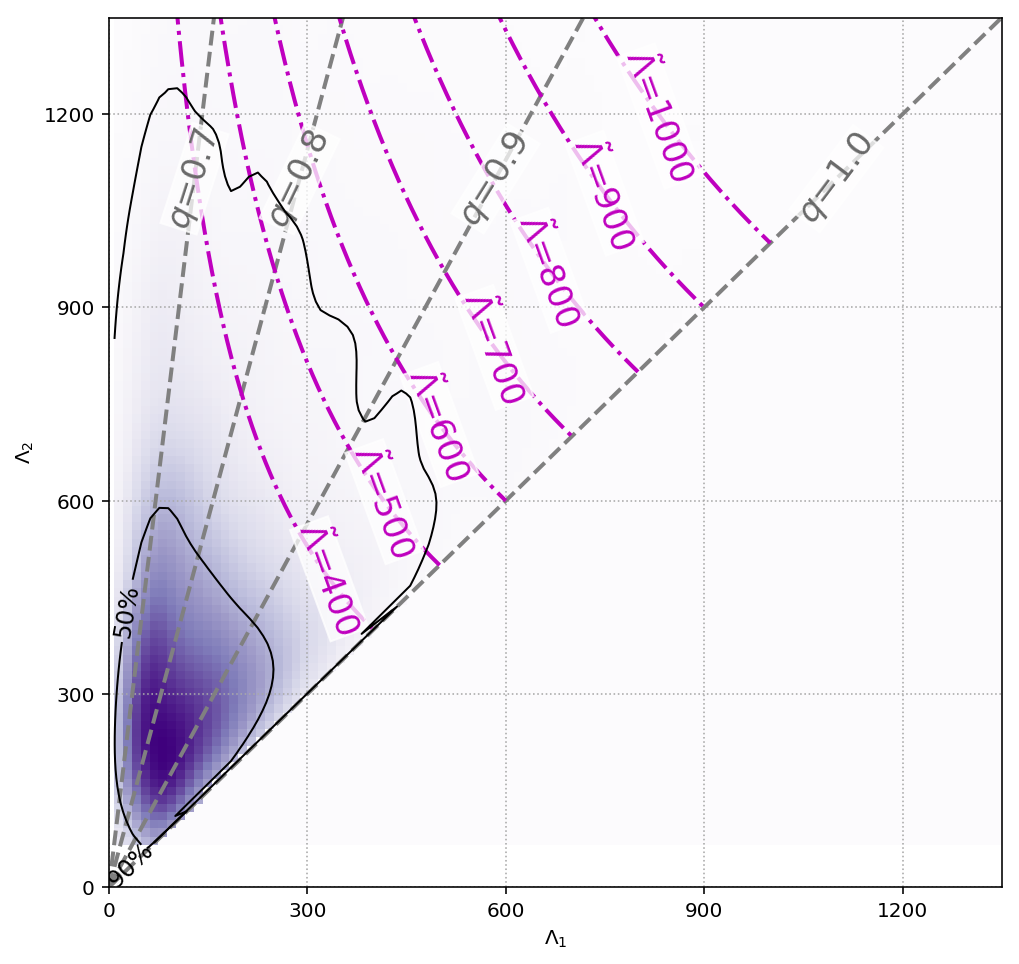

In [15]:
from pycbc.results.scatter_histograms import construct_kde

fig, ax = plt.subplots(figsize=(8, 8))
filename = 'uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf'

lambda1='lambdasym*((mass2/mass1)**3)'
lambda2='lambdasym*((mass1/mass2)**3)'

def create_density_plot_l2_gt_l1(xparam, yparam, samples, plot_density=True,
        plot_contours=True, percentiles=None, cmap='viridis', contour_color=None,
        xmin=None, xmax=None, ymin=None, ymax=None, fig=None, ax=None):
    """Computes and plots posterior density and confidence intervals using the
    given samples.

    Parameters
    ----------
    xparam : string
        The parameter to plot on the x-axis.
    yparam : string
        The parameter to plot on the y-axis.
    samples : dict, numpy structured array, or FieldArray
        The samples to plot.
    plot_density : {True, bool}
        Plot a color map of the density.
    plot_contours : {True, bool}
        Plot contours showing the n-th percentiles of the density.
    percentiles : {None, float or array}
        What percentile contours to draw. If None, will plot the 50th
        and 90th percentiles.
    cmap : {'viridis', string}
        The name of the colormap to use for the density plot.
    contour_color : {None, string}
        What color to make the contours. Default is white for density
        plots and black for other plots.
    xmin : {None, float}
        Minimum value to plot on x-axis.
    xmax : {None, float}
        Maximum value to plot on x-axis.
    ymin : {None, float}
        Minimum value to plot on y-axis.
    ymax : {None, float}
        Maximum value to plot on y-axis.
    fig : {None, pyplot.figure}
        Add the plot to the given figure. If None and ax is None, will create
        a new figure.
    ax : {None, pyplot.axes}
        Draw plot on the given axis. If None, will create a new axis from
        `fig`.

    Returns
    -------
    fig : pyplot.figure
        The figure the plot was made on.
    ax : pyplot.axes
        The axes the plot was drawn on.
    """
    if percentiles is None:
        percentiles = numpy.array([50., 90.])
    percentiles = 100. - numpy.array(percentiles)
    percentiles.sort()

    if ax is None and fig is None:
        fig = pyplot.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    ax.grid(True, linestyle='dotted', color='gray')

    # convert samples to array and construct kde
    xsamples = samples[xparam]
    ysamples = samples[yparam]
    arr = numpy.vstack((xsamples, ysamples)).T
    kde = construct_kde(arr)

    # construct grid to evaluate on
    if xmin is None:
        xmin = xsamples.min()
    if xmax is None:
        xmax = xsamples.max()
    if ymin is None:
        ymin = ysamples.min()
    if ymax is None:
        ymax = ysamples.max()
    npts = 100
    X, Y = numpy.mgrid[xmin:xmax:complex(0,npts), ymin:ymax:complex(0,npts)] # pylint:disable=invalid-slice-index

    X_ravel = X.ravel()
    Y_ravel = Y.ravel()
    pos = numpy.vstack([X_ravel, Y_ravel])

    Z_ravel = kde(pos).T
    draw = kde.resample
    
    for i in range(len(X_ravel)):
        if Y_ravel[i] < X_ravel[i]:
            X_ravel[i] = 0
            Y_ravel[i] = 0
            Z_ravel[i] = 0
    X = X_ravel.reshape(X.shape)
    Y = Y_ravel.reshape(X.shape)
    Z = Z_ravel.reshape(X.shape)
    
    if plot_density:
        ax.imshow(numpy.rot90(Z), extent=[xmin, xmax, ymin, ymax],
            aspect='auto', cmap=cmap, zorder=1)
        
    if plot_contours:
        # compute the percentile values
        resamps = kde(draw(int(npts**2)))
        s = numpy.percentile(resamps, percentiles)
        lw = 1
        ct = ax.contour(X, Y, Z, s, colors=contour_color, linewidths=lw,
                        zorder=3)
        # label contours
        lbls = ['{p}%'.format(p=int(p)) for p in (100. - percentiles)]
        fmt = dict(zip(ct.levels, lbls))
        fs = 12
        ax.clabel(ct, ct.levels, inline=True, fmt=fmt, fontsize=fs)
        
    return fig, ax


# read samples
params = [lambda1, lambda2]
with InferenceFile(filename, "r") as fp:
    samples = fp.read_samples(params)
    
# Make density plot
create_density_plot_l2_gt_l1(lambda1, lambda2, samples, fig=fig, ax=ax,
                    plot_density=True, plot_contours=True, cmap='Purples',
                    xmax=1350, ymax=1350,
                    contour_color="black")
# Plot q contours
lambda1=numpy.linspace(0, 1350, 10000)
for q in [0.7, 0.8, 0.9, 1.0]:
    lambda2=lambda1*(1.0/q**6)
    ax.plot(lambda1, lambda2, color="grey", linestyle='dashed', linewidth=2)
    bbox_props = dict(boxstyle="square,pad=0.03", fc='w', ec='w', alpha=0.75)
    ax.text(1100*q**6, 1100, r'$q$={}'.format(q), color='dimgrey', va="center", ha="center", bbox=bbox_props, rotation=45*(1.0/q)+8, zorder=2, fontsize=17)

# Plot \tilde \Lambda contours
q_array=numpy.linspace(0.55,1.0,10000)
for lambda_tilde in [1000.0, 900.0, 800.0, 700.0, 600.0, 500.0, 400.0]:
    delta_lambda_array = []
    lambda2_array=[]
    lambda1_array=[]
    for q in q_array:
        lambda1=(13./16.)*lambda_tilde*(((q**2)*(1.0 + q)**5)/(12*q**3 + q**2 + q + 12))
        lambda2=lambda1/q**6
        lambda1_array.append(lambda1)
        lambda2_array.append(lambda2)
    ax.plot(lambda1_array, lambda2_array, 'm', linestyle='dashdot', linewidth=2)
    bbox_props = dict(boxstyle="square,pad=0.03", fc='w', ec='w', alpha=0.75)
    ax.text(lambda1_array[int(len(lambda1_array)/1.15)], lambda2_array[int(len(lambda2_array)/1.15)], r'$\~\Lambda$={}'.format(int(lambda_tilde)), color='m', va="center", ha="center", bbox=bbox_props, rotation=290, zorder=2, fontsize=17)

    
ax.grid(linestyle='dotted', color='darkgray')
ticks = [0, 300, 600, 900, 1200]
h = ax.set(xlim=(0, 1350), ylim=(0, 1350), xticks=ticks, yticks=ticks, xlabel=r"$\Lambda_1$", ylabel=r"$\Lambda_2$")

## To make Fig. 3 - main text
### $\hat R - \tilde{\Lambda}$ plot

We use the mchirp and lambda_tilde(mass1, mass2, lambda1, lambda2) posterior to get the radius posterior using Eq. 16 of the main text.

Note : This code can take a few minutes to run

In [9]:
!pycbc_inference_plot_posterior\
    --input-file uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf \
    galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf \
    --output-file radius_lambda_tilde_posterior.png \
    --plot-marginal \
    --plot-contour \
    --contour-percentiles 90 \
    --parameters \
            'lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)):$\tilde{\Lambda}$' \
            '11.2*(mchirp/(1+redshift(40.7)))*((lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)))/800)**(1./6.):$\hat R$' \
    --mins '11.2*(mchirp/(1+redshift(40.7)))*((lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)))/800)**(1./6.):8'\
    --maxs 'lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)):1000' \
        '11.2*(mchirp/(1+redshift(40.7)))*((lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)))/800)**(1./6.):15.0'\
    --input-file-labels "Uniform distribution" "Double Neutron Stars" "Galactic Neutron Stars" \
    --verbose

/home/soumi.de/pycbc-v1.9.4/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-08-18 04:13:26,268 Loading parameters
2018-08-18 04:13:26,268 Reading input file uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf
2018-08-18 04:13:26,269 Loading samples
2018-08-18 04:13:26,282 Reading input file dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf
2018-08-18 04:13:26,283 Loading samples
2018-08-18 04:13:26,295 Reading input file galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf
2018-08-18 04:13:26,295 Loading samples
2018-08-18 04:13:26,322 Plotting
/home/soumi.de/pycbc-v1.9.4/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.


2018-08-18 04:14:16,282 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/home/soumi.de/pycbc-dev3/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-08-18 04:14:16,768 STREAM 'IHDR' 16 13
2018-08-18 04:14:16,769 STREAM 'sBIT' 41 4
2018-08-18 04:14:16,769 'sBIT' 41 4 (unknown)
2018-08-18 04:14:16,769 STREAM 'pHYs' 57 9
2018-08-18 04:14:16,769 STREAM 'tEXt' 78 57
2018-08-18 04:14:16,769 STREAM 'IDAT' 147 8192
2018-08-18 04:14:16,986 Done


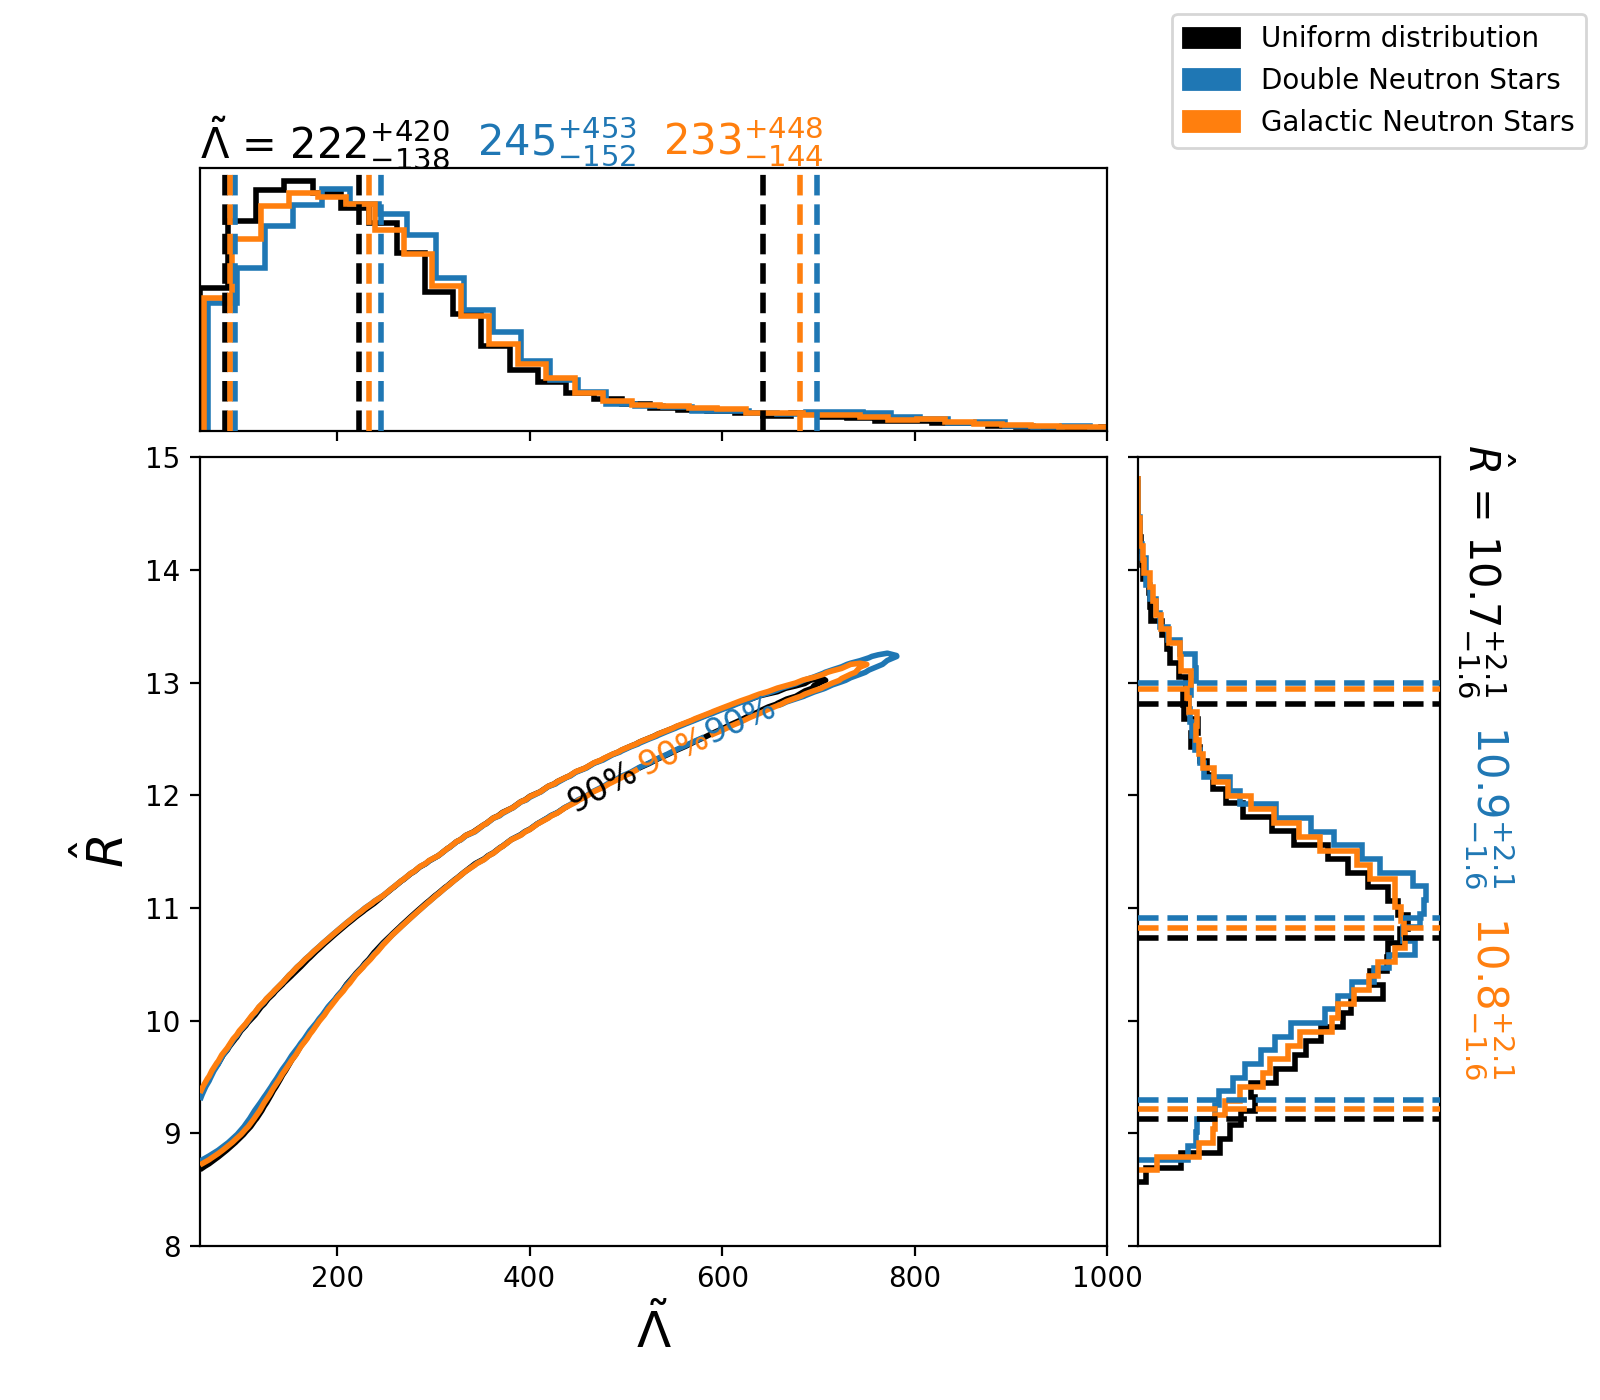

In [10]:
Image('radius_lambda_tilde_posterior.png')

## To plot Fig. 4 - supplementary material :
### Posterior probability density from unconstrained $\Lambda_{1,2}$, $m_{1,2} \sim U[1, 2] M_\odot$ analysis with 50% and 90% upper limit contours from our analysis vs. LVC analysis

Note : This code can take a few minutes to run

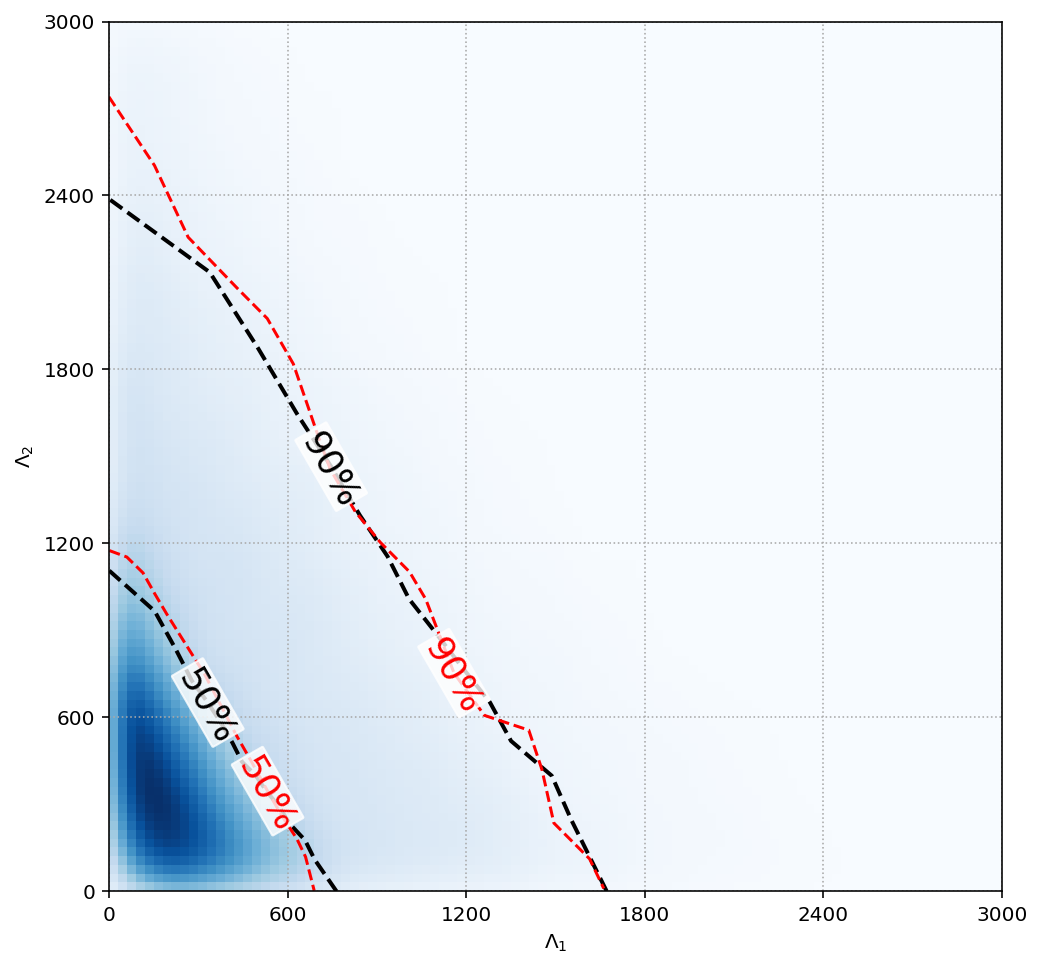

In [16]:
from math import ceil
from scipy.interpolate import UnivariateSpline

filename = 'independent_lambda_uniform_mass_30hz_lowfreq_posterior.hdf'
params = ['lambda1', 'lambda2']
with InferenceFile(filename, "r") as fp:
    samples = fp.read_samples(params)


def angsort(data, phi_step=1.0):
    """This sorts posterior samples into angular bins of width `phi_step.`
    Returns a list of tuples of format:
    (bin location in deg, 50% radial distance, 90% radial distance)
    """
    lambda1 = data['lambda1']
    lambda2 = data['lambda2']
    max_lambda = max(lambda1+lambda2)
    ang_bin_dict = {i*phi_step: [] for i in range(int(90/phi_step))}

    for l1, l2 in zip(lambda1, lambda2):
        phi = numpy.arctan(l2/l1) * 180./numpy.pi
        d = numpy.sqrt(l1**2 + l2**2)

        # sort into 1D (angular) bin
        for a in ang_bin_dict:
            if phi >= a and phi < a+phi_step:
                ang_bin_dict[a].append(d)

    contour_points_1D = []
    for bound in ang_bin_dict:
        num_samples = len(ang_bin_dict[bound])
        # sort into ascending order so we can get upper bounds
        ang_bin_dict[bound].sort()
        if bound == 0:
            b = bound
        elif bound == 90 - phi_step:
            b = 90*numpy.pi/180.
        else:
            b = (bound+0.5*phi_step)*numpy.pi/180.
        try:
            contour_points_1D.append((b,
                                  ang_bin_dict[bound][int(round(0.5*num_samples))],
                                  ang_bin_dict[bound][int(round(0.9*num_samples))]))
        except IndexError:
            print("Bin {} has zero samples".format(b))

    contour_points_1D.sort(key=lambda x: x[0])
    return contour_points_1D

# digitized LVC contours
lambda1_lvc50 = [1.2135922330096491, 59.46601941747565, 114.07766990291248, 154.12621359223294, 194.1747572815533, 321.6019417475727, 427.1844660194174, 478.1553398058252, 532.7669902912621, 580.0970873786407, 631.0679611650485, 660.1941747572816, 689.3203883495146,]
lambda2_lvc50 = [1175.1736234143577, 1153.1340797959037, 1098.2566791864501, 1025.1665367443834, 955.7260293388135, 747.3867904471686, 539.1007015803275, 447.7358089433769, 345.41315285947076, 261.3563886329812, 180.94040110551987, 118.82573878534458, 1.9665509177234526]
lambda1_lvc90 = [-0.567126636733633, 152.54824984132188, 265.7384987893462, 429.59989656550454, 531.5504595782692, 619.0965937140037, 666.6558922400619, 703.2399680293378, 743.4648205176428, 827.3525470744495, 911.1433037918147, 1009.4530901055504, 1064.1617104304287, 1159.2097839629514, 1261.2573168151584, 1410.2911445967234, 1454.2008509838029, 1494.6020122710925, 1614.7564587790034, 1662.2187874656197]
lambda2_lvc90 = [2740.2912621359224, 2503.640776699029, 2256.0679611650485, 2081.3106796116504, 1975.7281553398059, 1819.1747572815534, 1677.1844660194174, 1567.9611650485438, 1455.097087378641, 1309.4660194174758, 1203.883495145631, 1101.9417475728155, 1007.2815533980583, 752.4271844660193, 606.7961165048546, 555.8252427184466, 421.11650485436894, 235.43689320388376, 111.65048543689318, 9.708737864077648]

# get angular-binned contours
contour_points = angsort(samples, phi_step=6)

# convert to cartesian, make spline fits, and plot
phis, rad1, rad2 = zip(*contour_points)
xx1 = numpy.array([r*numpy.cos(p) for p, r in zip(phis, rad1)])
yy1 = numpy.array([r*numpy.sin(p) for p, r in zip(phis, rad1)])
idx1 = numpy.argsort(xx1)
sp1 = UnivariateSpline(xx1[idx1], yy1[idx1], k=5, s=0)

xx2 = numpy.array([r*numpy.cos(p) for p, r in zip(phis, rad2)])
yy2 = numpy.array([r*numpy.sin(p) for p, r in zip(phis, rad2)])
idx2 = numpy.argsort(xx2)
sp2 = UnivariateSpline(xx2[idx2], yy2[idx2], k=5, s=0)

# Make plot
fig, ax = plt.subplots(figsize=(8, 8))
create_density_plot('lambda1', 'lambda2', samples, fig=fig, ax=ax,
                    plot_density=True, plot_contours=False, cmap='Blues',
                    xmax=3000, ymax=3000, contour_color='k')

# Plot 50% and 90% upper limits from our analysis
bbox_props = dict(boxstyle="round,pad=0.03", fc='w', ec='w', alpha=0.8)
ax.text(xx1[int(len(xx1)/1.5)], sp1(xx1)[int(len(sp1(xx1))/1.5)], r'50$\%$', color='k', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)
ax.plot(xx1, sp1(xx1), linestyle='--', color="k", linewidth=2)
ax.text(xx2[int(len(xx2)/1.5)], sp2(xx2)[int(len(sp2(xx2))/1.5)], r'90$\%$', color='k', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)
ax.plot(xx2, sp2(xx2), linestyle='--', color="k", linewidth=2)

# Plot 50% and 90% upper limit from LVC analysis
ax.plot(lambda1_lvc50, lambda2_lvc50, 'red', linestyle='--')
ax.text(lambda1_lvc50[int(len(lambda1_lvc50)/1.5)], lambda2_lvc50[int(len(lambda2_lvc50)/1.5)], r'50$\%$', color='red', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)
ax.plot(lambda1_lvc90, lambda2_lvc90, 'red', linestyle='--')
ax.text(lambda1_lvc90[int(len(lambda1_lvc90)/1.5)], lambda2_lvc90[int(len(lambda2_lvc90)/1.5)], r'90$\%$', color='red', va="center", ha="center", bbox=bbox_props, rotation=300, zorder=5, fontsize=18)

ax.grid(linestyle='dotted', color='darkgray')
ticks = [0, 600, 1200, 1800, 2400, 3000]
h = ax.set(xlim=(0, 3000), ylim=(0, 3000), xticks=ticks, yticks=ticks,
           xlabel=r"$\Lambda_1$", ylabel=r"$\Lambda_2$")

## To plot Fig. 6 - supplementary material
### Full posteriors plot

We use the predefined transform in PyCBC to transform to `mchirp` using the `mass1`, `mass2` posteriors and transform to `chi_eff` using `mass1`, `mass2`, `spin1z`, `spin2z` posteriors stored in the data files. Note that this can take ~10 minutes to finish plotting.

In [17]:
!pycbc_inference_plot_posterior \
    --input-file uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf \
    galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf uniform_mass_prior_common_eos_25hz_lowfreq_posteriors.hdf \
    --output-file full_posteriors_common_eos.png \
    --plot-marginal \
    --plot-contour \
    --parameters \
            "mchirp/(1+redshift(40.7)):$\mathcal{M}^{src}$" \
            "mass2/mass1:\$q$" \
            "mass1/(1+redshift(40.7)):\$m_1^{src}$" \
            "mass2/(1+redshift(40.7)):\$m_2^{src}$" \
            chi_eff \
            'lambda_tilde(mass1, mass2, lambdasym*((mass2/mass1)**3), lambdasym*((mass1/mass2)**3)):$\tilde{\Lambda}$' \
    --input-file-labels "Uniform distribution, 20 Hz low-frequency cutoff" "Double Neutron Stars, 20 Hz low-frequency cutoff" "Galactic Neutron Stars, 20 Hz low-frequency cutoff" "Uniform distribution, 25 Hz low-frequency cutoff" \
    --verbose

/home/soumi.de/pycbc-v1.9.4/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-08-18 04:39:21,558 Loading parameters
2018-08-18 04:39:21,558 Reading input file uniform_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf
2018-08-18 04:39:21,560 Loading samples
2018-08-18 04:39:21,673 Reading input file dns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf
2018-08-18 04:39:21,674 Loading samples
2018-08-18 04:39:21,705 Reading input file galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors.hdf
2018-08-18 04:39:21,706 Loading samples
2018-08-18 04:39:21,793 Reading input file uniform_mass_prior_common_eos_25hz_lowfreq_posteriors.hdf
2018-08-18 04:39:21,794 Loading samples
2018-08-18 04:39:21,876 Plotting
/home/soumi.de/pycbc-v1.9.4/lib/python2

2018-08-18 04:56:15,139 STREAM 'IHDR' 16 13
2018-08-18 04:56:15,139 STREAM 'sBIT' 41 4
2018-08-18 04:56:15,139 'sBIT' 41 4 (unknown)
2018-08-18 04:56:15,139 STREAM 'pHYs' 57 9
2018-08-18 04:56:15,139 STREAM 'tEXt' 78 57
2018-08-18 04:56:15,139 STREAM 'IDAT' 147 8192
2018-08-18 04:56:16,239 Done


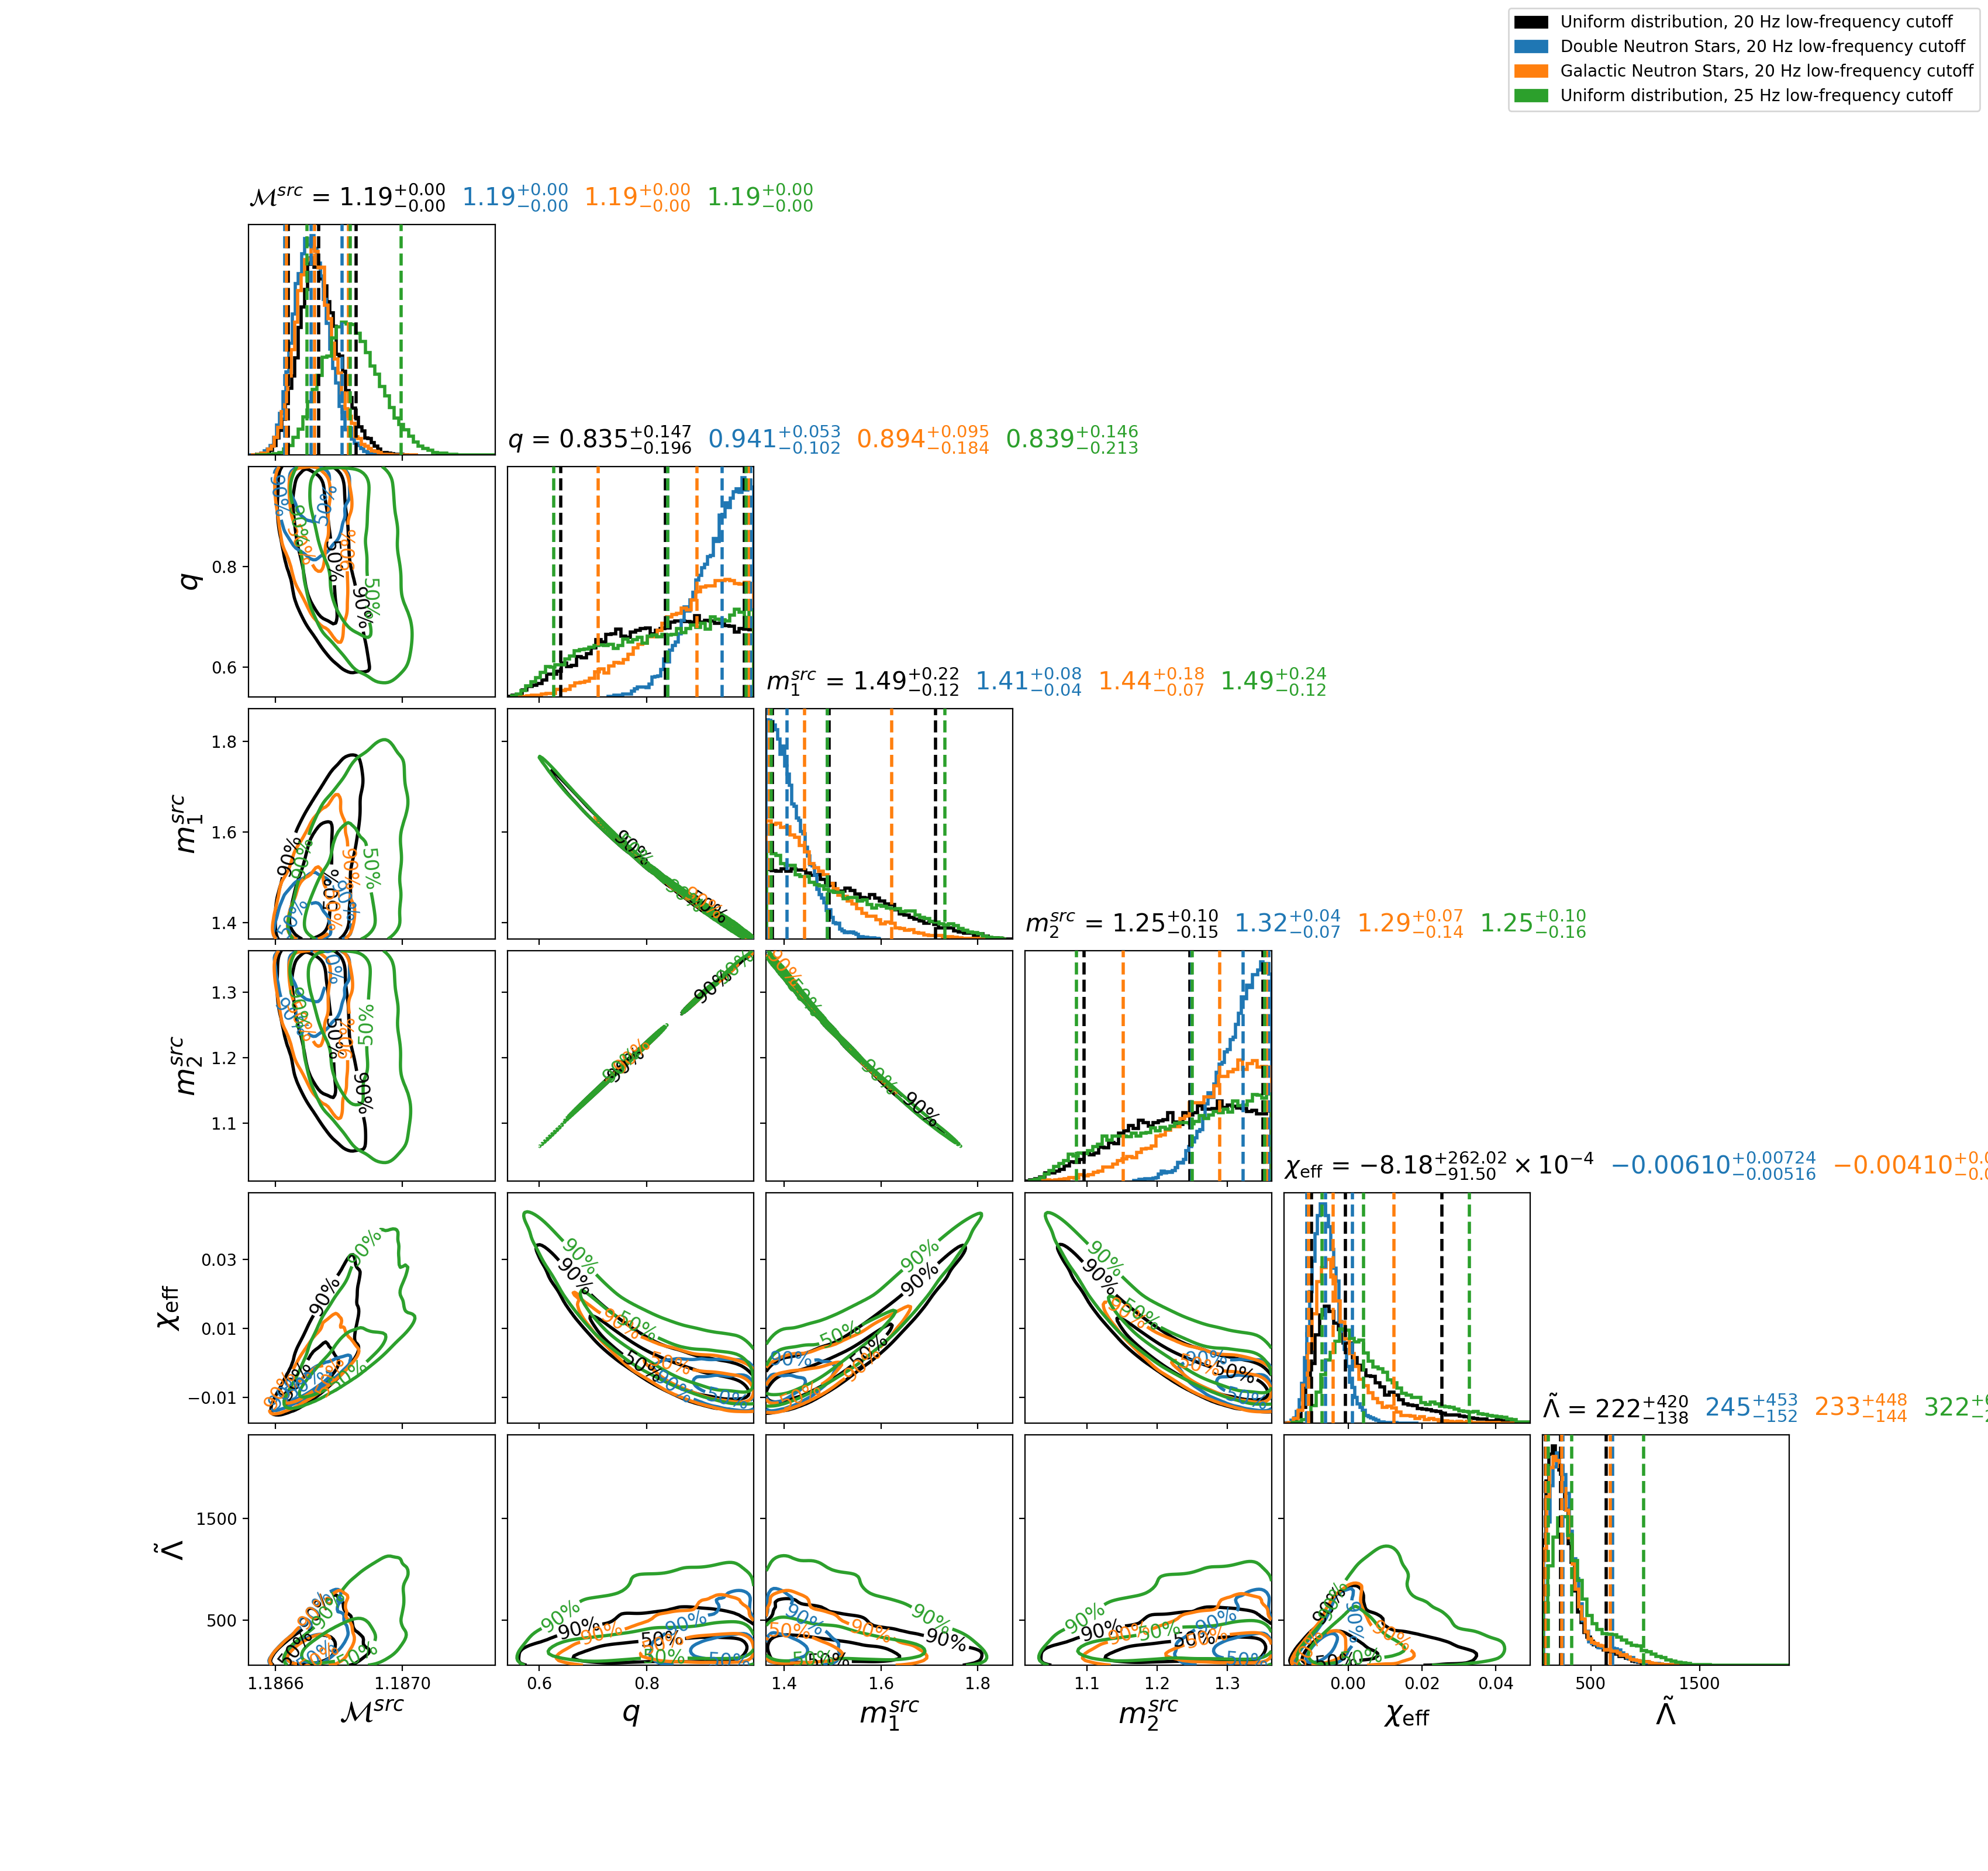

In [18]:
Image('full_posteriors_common_eos.png')

## To do Bayes factor calculations

We show the method we used in the paper for calculating the Bayes factor between two models. Below we show the example for doing the calculation for comparing the (uniform mass prior EOS constrained analysis)/(uniform mass prior unconstrained $\Lambda$ analysis). 

To calculate Bayes factors for (DNS mass prior EOS constrained analysis)/(DNS mass prior unconstrained $\Lambda$ analysis), change the `posteriors_model1` and `posteriors_model2` to : 

```
posteriors_model1='dns_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf'
posteriors_model2='dns_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf'
```

To calculate Bayes factors for (Galactic NS mass prior EOS constrained analysis)/(Galactic NS mass prior unconstrained $\Lambda$ analysis), change the `posteriors_model1` and `posteriors_model2` to :

```
posteriors_model1='galactic_ns_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf'
posteriors_model2='galactic_ns_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf'
```


In [19]:
from pycbc.io.inference_hdf import InferenceFile
from pycbc.inference import option_utils
import emcee
import numpy

posteriors_model1='uniform_mass_prior_common_eos_20hz_lowfreq_posteriors_long_chain.hdf'
posteriors_model2='uniform_mass_prior_independent_lambdas_20hz_lowfreq_posteriors_long_chain.hdf'

def calc_evidence(fp, start_iter=None, end_iter=None, interval_iter=None):

    stats_group=fp.stats_group
    parameters = fp[stats_group].keys()
    logstats = fp.read_samples(parameters, samples_group=stats_group, thin_start=start_iter, thin_end=end_iter, thin_interval=interval_iter, temps='all', flatten=False)
    logls = logstats['loglr'] + fp.lognl
    betas = numpy.array(fp.attrs['betas'])
    ntemps = fp.ntemps
    nwalkers = fp.nwalkers
    ndim = len(fp.variable_args)
    dummy_sampler = emcee.PTSampler(ntemps, nwalkers, ndim, None, None, betas=betas)
    lnz, dlnz = dummy_sampler.thermodynamic_integration_log_evidence(logls=logls, fburnin=0.0)
    return lnz, dlnz


# Posterior file for model 1
fp1=InferenceFile(posteriors_model1,'r')
# Posterior file for model 2
fp2=InferenceFile(posteriors_model2, 'r')

lnz1, dlnz2  = calc_evidence(fp1, start_iter=0, end_iter=-1, interval_iter=1)
lnz2, dlnz2 = calc_evidence(fp2, start_iter=0, end_iter=-1, interval_iter=1)

# Calculate Bayes factor of model 1 over model 2
bayes_factor=numpy.exp(lnz1 - lnz2)

print("Bayes factor=%f"%bayes_factor)

Bayes factor=370.576025


## Acknowledgements

We thank Stefan Ballmer, Swetha Bhagwat, Steven Reyes, Andrew Steiner, and Douglas Swesty for helpful discussions. We particularly thank Collin Capano and Alexander Nitz for contributing to the development of PyCBC Inference.


## Funding

This work was supported by NSF grants PHY-1404395 (DAB, CMB), PHY-1707954 (DAB, SD), PHY-1607169 (SD), AST-1559694 (DF), AST-1714498 (EB), and DOE Award DE-FG02-87ER40317 (JML). Computations were supported by Syracuse University and NSF award OAC-1541396. DAB, EB, SD, and JML thank Kavli Institute for Theoretical Physics which is supported by the NSF grant PHY-1748958.